In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from matplotlib.colors import ListedColormap

In [2]:
# Load the dataset
zoo = pd.read_csv("Zoo.csv")

In [3]:
# Data Exploration
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
print("Missing values:\n", zoo.isnull().sum())

Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


C:\Users\ajayd\AppData\Local\Temp\ipykernel_13700\3627041070.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')


<Axes: >

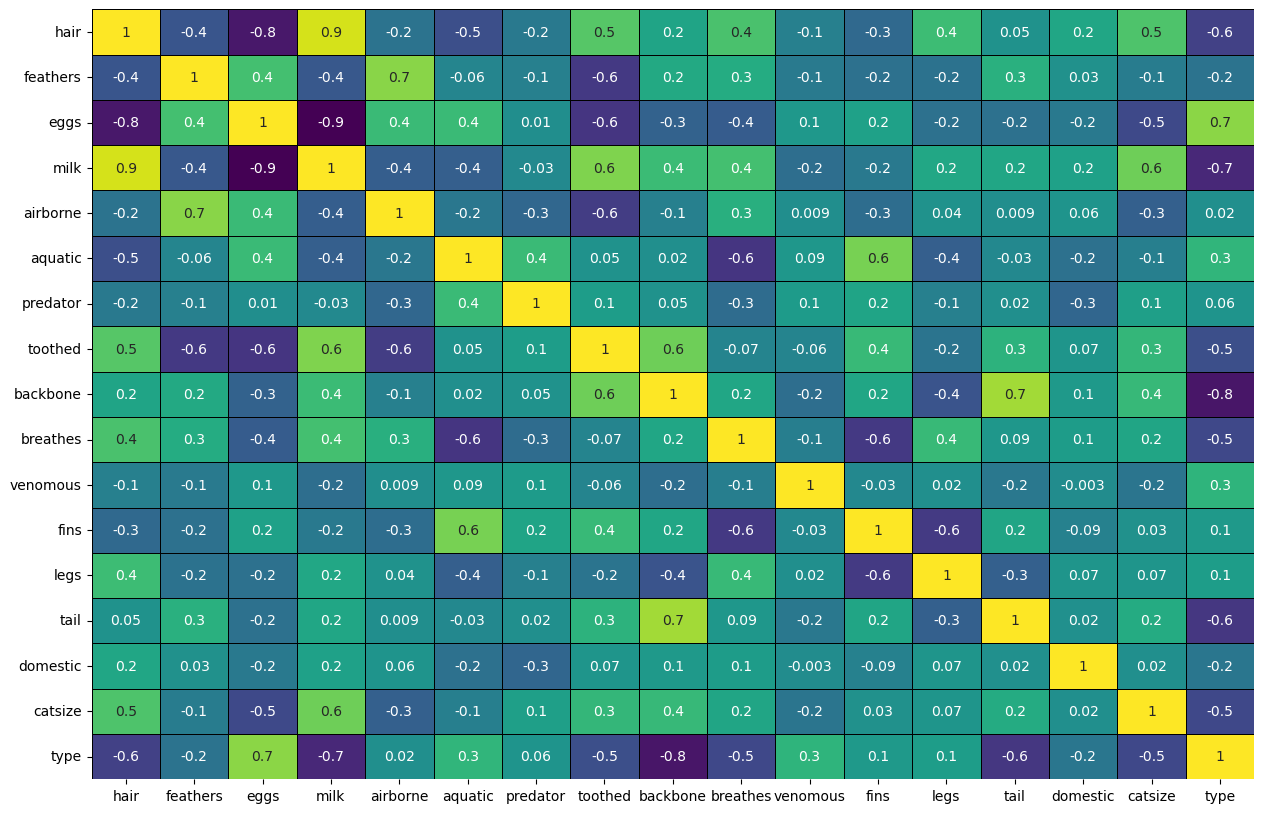

In [6]:
# Visualizations
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

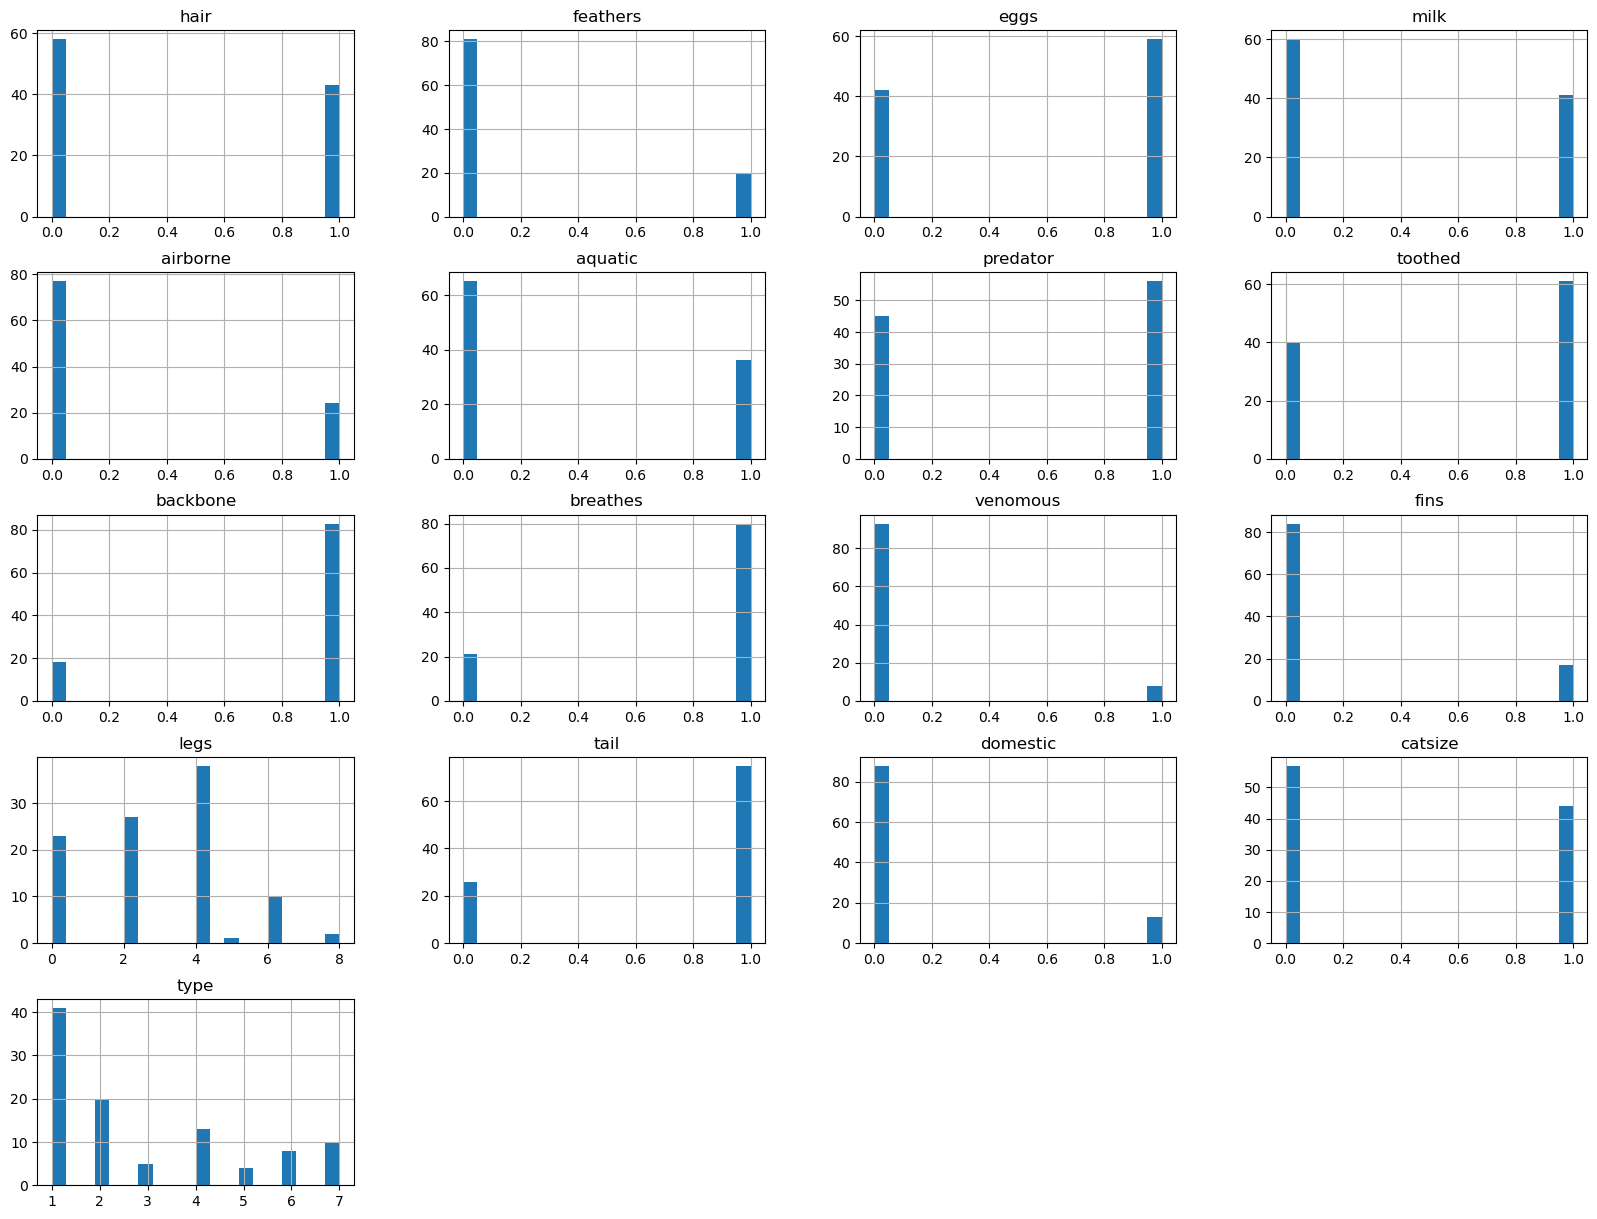

In [7]:
zoo.hist(bins=20, figsize=(20,15))
plt.show()

In [8]:
# Preprocessing the Data (Handling Missing Values & Outliers)
imputer = SimpleImputer(strategy='mean')
zoo_imputed = pd.DataFrame(imputer.fit_transform(zoo.drop(columns=['animal name'])), columns=zoo.columns[1:])

In [9]:
# Detect and handle outliers using Z-score method
z_scores = np.abs(zscore(zoo_imputed.select_dtypes(include=np.number)))
zoo_cleaned = zoo_imputed[(z_scores < 3).all(axis=1)]  # Keeping only those within 3 standard deviations

In [10]:
# Feature and target separation
X = zoo_cleaned.drop('type', axis=1)
y = zoo_cleaned['type'

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# Grid Search for Finding the Best K and Distance Metric
param_grid = {
    'n_neighbors': np.arange(1, 40),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [13]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

D:\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             scoring='accuracy')

In [14]:
print(f'Best K: {grid.best_params_["n_neighbors"]}, Best Metric: {grid.best_params_["metric"]}')
print(f'Best Cross-Validated Accuracy: {grid.best_score_}')

Best K: 1, Best Metric: manhattan
Best Cross-Validated Accuracy: 0.9714285714285715


In [15]:
# Using the best parameters to train the model
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [16]:
# Predictions and Evaluation
y_pred = best_knn.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9583333333333334
Precision: 0.9249999999999999
Recall: 0.9583333333333334
F1 Score: 0.9398148148148149

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        13
         2.0       0.80      1.00      0.89         4
         3.0       0.00      0.00      0.00         1
         4.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2

    accuracy                           0.96        24
   macro avg       0.80      0.83      0.81        24
weighted avg       0.92      0.96      0.94        24



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precisio


Confusion Matrix:
 [[13  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  2]]


In [18]:
# Cross-validation score for final model
cross_val = cross_val_score(best_knn, X, y, cv=10)
print(f'Cross-Validated Score: {cross_val.mean()}')

Cross-Validated Score: 0.97


D:\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


In [19]:
# Visualizing the Decision Boundaries (Using first two features for visualization)
X_train_2d = X_train.iloc[:, :2].values  # Select first two features for visualization
X_test_2d = X_test.iloc[:, :2].values

In [20]:
knn_2d = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], metric=grid.best_params_['metric'])
knn_2d.fit(X_train_2d, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [21]:
# Define the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

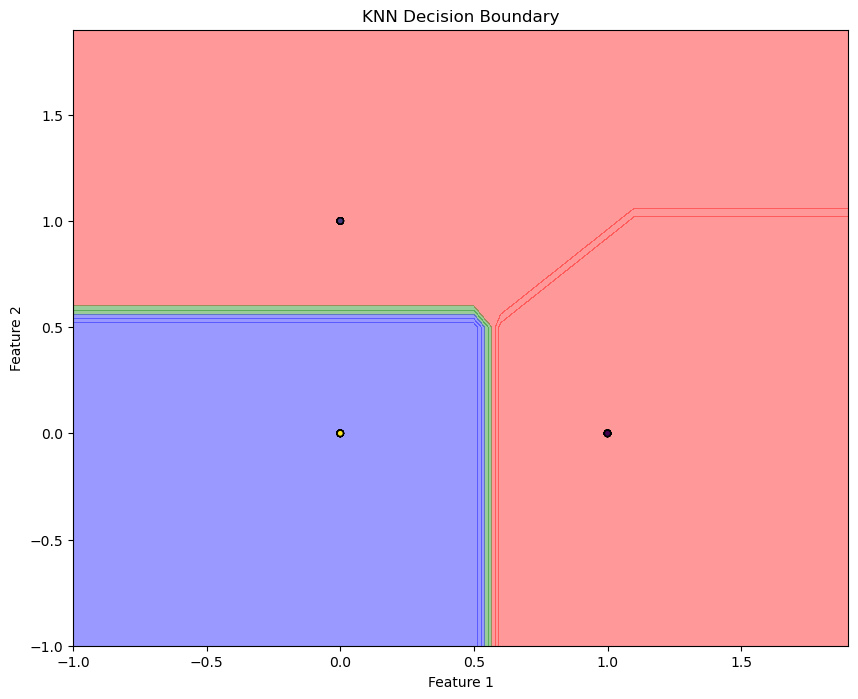

In [22]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('KNN Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# 1. Key Hyperparameters in KNN:
# Number of Neighbors (k): Determines how many neighbors are considered for predictions. Smaller values are sensitive to noise, larger values may over-generalize.

# Distance Metric: Defines how distances between points are calculated (e.g., Euclidean, Manhattan).

# Weights: Controls the influence of neighbors. Options include uniform (equal weight) and distance (closer neighbors have more influence).

# Algorithm: Determines the method for computing neighbors (e.g., auto, ball_tree, kd_tree, brute).

# Leaf Size: Affects the speed of tree-based algorithms like ball_tree and kd_tree.

# p (Minkowski Distance): For p=1, it’s Manhattan; for p=2, it’s Euclidean.

In [ ]:
# 2. Distance Metrics in KNN:
# Euclidean Distance: Straight-line distance between two points.

# Manhattan Distance: Sum of absolute differences between coordinates.

# Minkowski Distance: Generalized distance; includes Euclidean and Manhattan as special cases.

# Chebyshev Distance: Maximum absolute difference between coordinates.

# Mahalanobis Distance: Accounts for correlations between variables.

# Hamming Distance: Counts differing positions in categorical data.